In [63]:
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('heart.csv', sep=";")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Age : Age of the patient

# Sex : Sex of the patient

# exang: exercise induced angina (1 = yes; 0 = no)

# ca: number of major vessels (0-3)

# cp : Chest Pain type chest pain type

# Value 1: typical angina
# Value 2: atypical angina
# Value 3: non-anginal pain
# Value 4: asymptomatic

# trtbps : resting blood pressure (in mm Hg)

# chol : cholestoral in mg/dl fetched via BMI sensor

# fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

# rest_ecg : resting electrocardiographic results

# Value 0: normal
# Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
# thalach : maximum heart rate achieved

# target : 0= less chance of heart attack 1= more chance of heart attack

In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [8]:
df.drop_duplicates(keep='first',inplace=True)

In [9]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Heart attacks by sex')

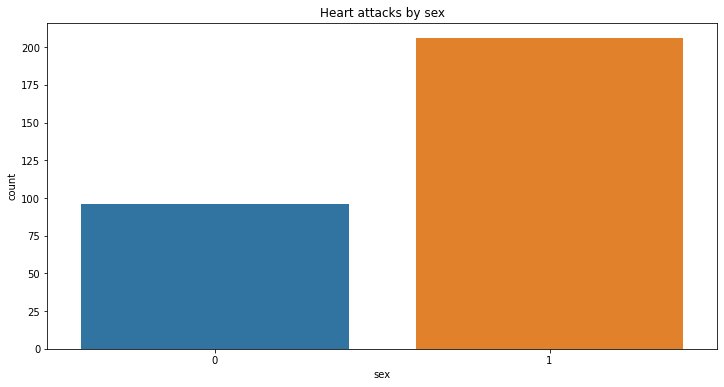

In [10]:
plt.figure(figsize=(12,6))

sns.countplot(data=df, x='sex')
plt.title('Heart attacks by sex')

Text(0.5, 1.0, 'Heart attacks by people having chest pain')

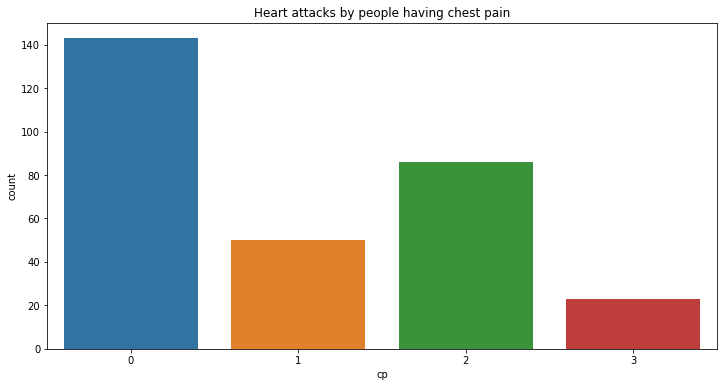

In [11]:
plt.figure(figsize=(12,6))

sns.countplot(data=df, x='cp')
plt.title('Heart attacks by people having chest pain')

In [12]:
df['cp'].value_counts()

0    143
2     86
1     50
3     23
Name: cp, dtype: int64

Text(0.5, 1.0, 'Breakdown of FBS')

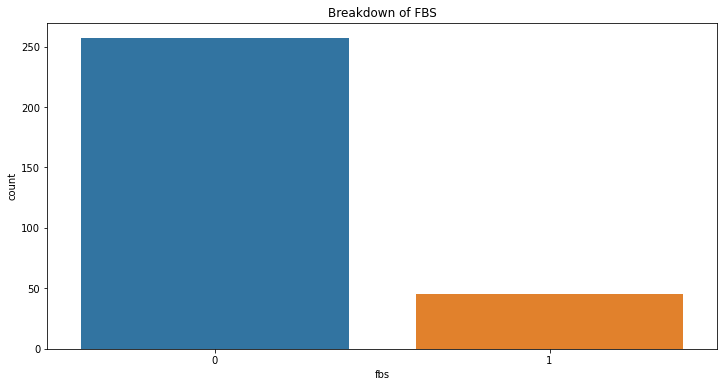

In [13]:
plt.figure(figsize=(12,6))

sns.countplot(data=df, x='fbs')
plt.title('Breakdown of FBS')

Text(0.5, 1.0, 'Breakdown of ecg')

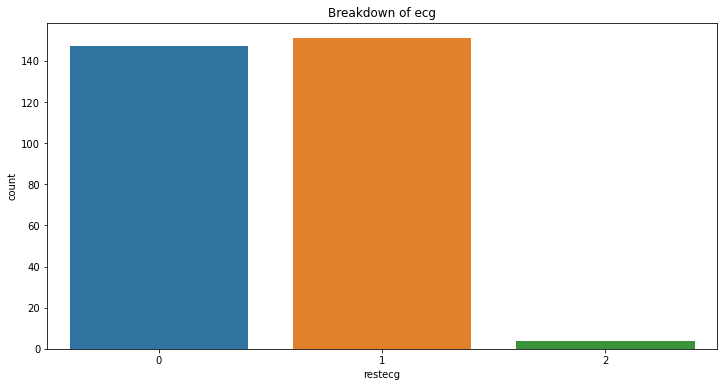

In [14]:
plt.figure(figsize=(12,6))

sns.countplot(data=df, x='restecg')
plt.title('Breakdown of ecg')

Text(0.5, 1.0, 'Breakdown of exng')

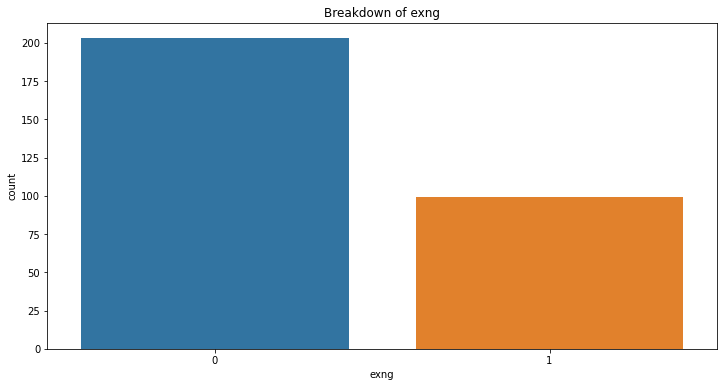

In [15]:
plt.figure(figsize=(12,6))

sns.countplot(data=df, x='exng')
plt.title('Breakdown of exng')

Text(0.5, 1.0, 'Breakdown for Thalium Stress Test')

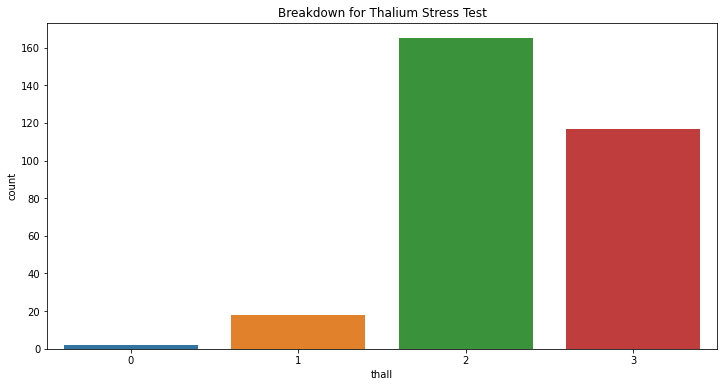

In [16]:
plt.figure(figsize=(12,6))

sns.countplot(data=df, x='thall')
plt.title('Breakdown for Thalium Stress Test')

<Figure size 1440x1440 with 0 Axes>

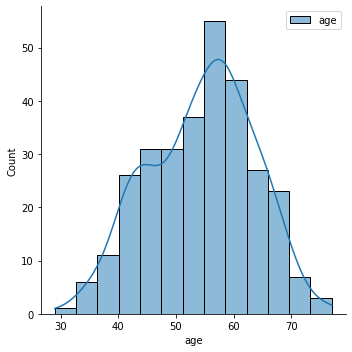

In [19]:
plt.figure(figsize=(20,20))

sns.displot(data=df['age'], label='age', kde=True)
plt.legend()

<Figure size 864x432 with 0 Axes>

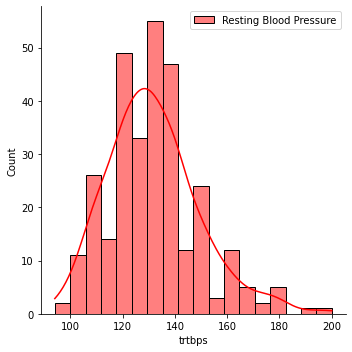

In [23]:
plt.figure(figsize=(12,6))

sns.displot(df.trtbps, color='red', label="Resting Blood Pressure", kde= True)

plt.legend()

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


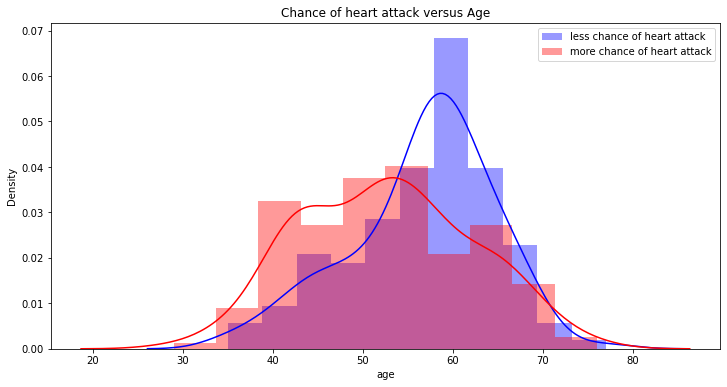

In [36]:
plt.figure(figsize=(12,6))

sns.distplot(df[df['output'] == 0]['age'], color='blue', label='less chance of heart attack', kde=True)
sns.distplot(df[df['output'] == 1]['age'], color='red', label='more chance of heart attack', kde=True)

plt.title('Chance of heart attack versus Age')
plt.legend()

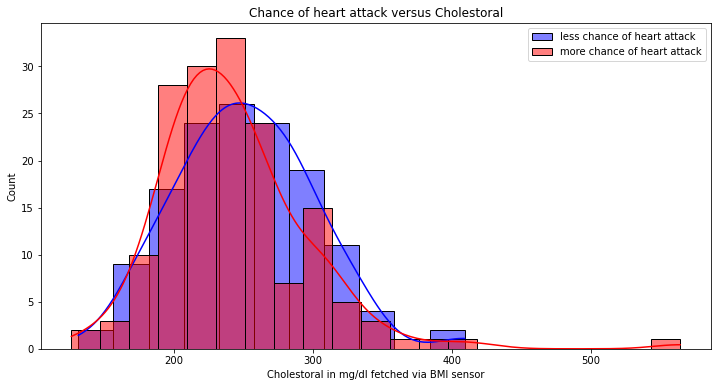

In [33]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['output'] == 0]['chol'], color='blue', label='less chance of heart attack', kde=True)
sns.histplot(df[df['output'] == 1]['chol'], color='red', label='more chance of heart attack', kde=True)

plt.xlabel('Cholestoral in mg/dl fetched via BMI sensor')
plt.title('Chance of heart attack versus Cholestoral')
plt.legend()

Text(0.5, 1.0, 'Chance of heart attack by blood pressure (in mm Hg)')

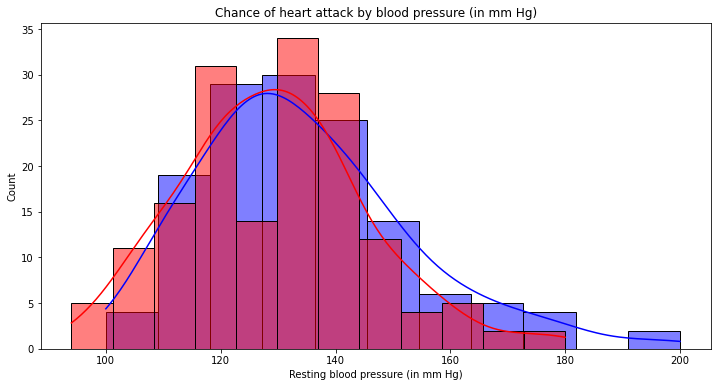

In [35]:
plt.figure(figsize=(12,6))

sns.histplot(df[df['output'] == 0]['trtbps'], label='less chance of heart attack', color='blue', kde=True)
sns.histplot(df[df['output'] == 1]['trtbps'], label='%more chance of heart attack', color='red', kde=True)

plt.xlabel('Resting blood pressure (in mm Hg)')
plt.title('Chance of heart attack by blood pressure (in mm Hg)')

In [37]:
df.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [58]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [60]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
conf = confusion_matrix(y_test, y_pred)

print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, y_pred)*100, "%")

The accuracy of Logistic Regression is :  86.88524590163934 %


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, y_pred.round())*100, "%")

The accuracy of Random Forest is :  85.24590163934425 %
